## New try

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv("C:\\Users\\LENOVO\\Downloads\\Ads_CTR_Optimisation.csv")

# Implementing Random Selection
import random
N = 10000
d = 10
ads_selected = []
total_reward = 0
for n in range(0, N):
    ad = random.randrange(d)
    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    total_reward = total_reward + reward

In [3]:
total_reward

1242

In [29]:
# Implementing UCB
import math
N = 10000
d = 10
ads_selected = []
numbers_of_selections = [0] * d
sums_of_reward = [0] * d
total_reward = 0

for n in range(0, N):
    ad = 0
    max_upper_bound = 0
    for i in range(0, d):
        if (numbers_of_selections[i] > 0):
            average_reward = sums_of_reward[i] / numbers_of_selections[i]
            delta_i = math.sqrt(2 * math.log(n+1) / numbers_of_selections[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
    ads_selected.append(ad)
    numbers_of_selections[ad] += 1
    reward = dataset.values[n, ad]
    sums_of_reward[ad] += reward
    total_reward += reward

In [30]:
total_reward

2125

In [31]:
## Thomson

import random
N = 10000
d = 10
ads_selected = []
numbers_of_rewards_1 = [0] * d
numbers_of_rewards_0 = [0] * d
total_reward = 0
for n in range(0, N):
    ad = 0
    max_random = 0
    for i in range(0, d):
        random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
        if random_beta > max_random:
            max_random = random_beta
            ad = i
    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    if reward == 1:
        numbers_of_rewards_1[ad] = numbers_of_rewards_1[ad] + 1
    else:
        numbers_of_rewards_0[ad] = numbers_of_rewards_0[ad] + 1
    total_reward = total_reward + reward

In [32]:
total_reward

2614

In [4]:
# Implementing epsilon greedy
import math
N = 10000
d = 10
ads_selected = []
numbers_of_selections = [0] * d
sums_of_reward = [0] * d
average_reward = list(dataset.values[0])
total_reward = 0
epsilon = 0.1
sss = []

for n in range(0, N):
    ad = 0
    for i in range(0, d):
        random_number = np.random.binomial(1, epsilon)
    
        if random_number == 1:
            ## go explore
            j = np.random.choice(d)
            ad = j
            ads_selected.append(ad)
            numbers_of_selections[ad] += 1        
            reward = dataset.values[n, ad]
            sums_of_reward[ad] += reward
            average_reward[ad] = sums_of_reward[ad] / numbers_of_selections[ad]

        else:
            ## go exploit
            j = np.argmax(average_reward[-d:])
            ad = j
            ads_selected.append(ad)
            numbers_of_selections[ad] += 1        
            reward = dataset.values[n, ad]
            sums_of_reward[ad] += reward
            average_reward[ad] = sums_of_reward[ad] / numbers_of_selections[ad]
    
    total_reward += reward

In [5]:
total_reward

2554

In [7]:
len(ads_selected)

100000

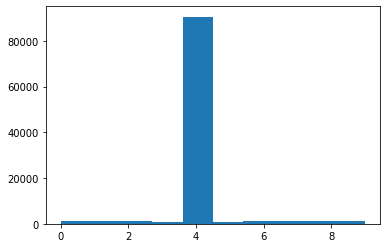

(25, 250)

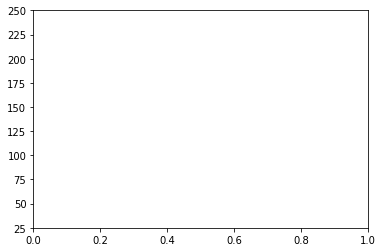

In [13]:
plt.hist(ads_selected)
plt.show()

In [16]:
a = ads_selected.count(0)
b = ads_selected.count(1)
c = ads_selected.count(2)
d = ads_selected.count(3)
e = ads_selected.count(4)
f = ads_selected.count(5)
g = ads_selected.count(6)
h = ads_selected.count(7)
i = ads_selected.count(8)
j = ads_selected.count(9)

In [21]:
x= []
x.append(a)

x.append(b)

x.append(c)

x.append(d)


x.append(e)

x.append(f)
x.append(g)

x.append(h)
x.append(i)
x.append(j)

In [22]:
x

[1128, 1024, 1008, 1002, 90560, 979, 1038, 1057, 1183, 1021]

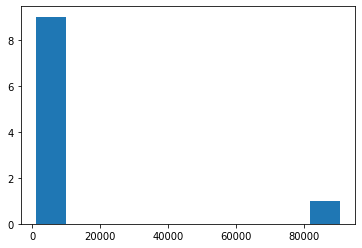

In [24]:
plt.hist(x)
plt.show()